### Importing required Data Processing, Data Visualisation Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading data & Viewing data

In [17]:
df = pd.read_csv("HousePricePrediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### Checking how many null values are there in the dataset

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

### Understanding data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


# Data Exploration & Data Visualisation

In [6]:
obj = df.dtypes == 'object'
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = df.dtypes == 'int'
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = df.dtypes == 'float'
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


### There are 4 categorical features in the dataset. We have to convert into numerical features to explore the data further.

In [7]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: title={'center': 'No. of Unique values of Categorical Features'}>

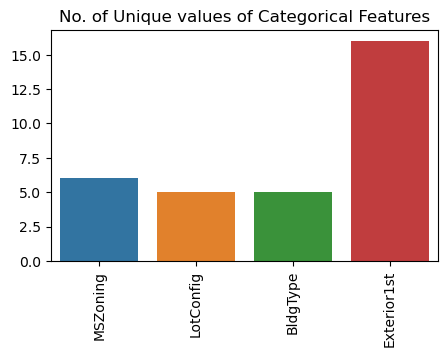

In [8]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(5,3))
plt.title('No. of Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

### The plot shows that Exterior1st has around 16 unique categories which is highest among other categorical features and other features have around  6 unique categories

### Let's plot number of values in each categorical feature

<Axes: title={'center': 'Categorical Features: MSZoning'}, ylabel='count'>

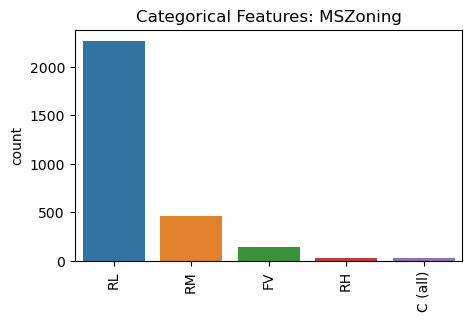

In [11]:
plt.figure(figsize=(5, 3))
plt.title('Categorical Features: MSZoning')
plt.xticks(rotation=90)
y = df[object_cols[0]].value_counts()
plt.xticks(rotation=90)
sns.barplot(x=list(y.index), y=y)


<Axes: title={'center': 'Categorical Features: LotConfig'}, ylabel='count'>

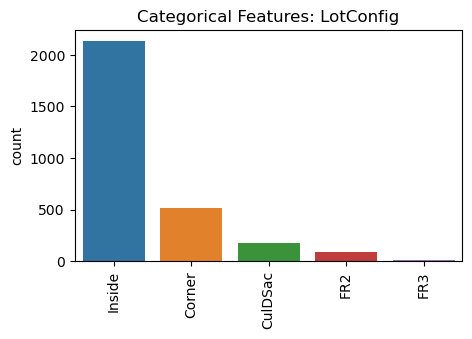

In [12]:
plt.figure(figsize=(5, 3))
plt.title('Categorical Features: LotConfig')
plt.xticks(rotation=90)
y = df[object_cols[1]].value_counts()
plt.xticks(rotation=90)
sns.barplot(x=list(y.index), y=y)


<Axes: title={'center': 'Categorical Features: BldgType'}, ylabel='count'>

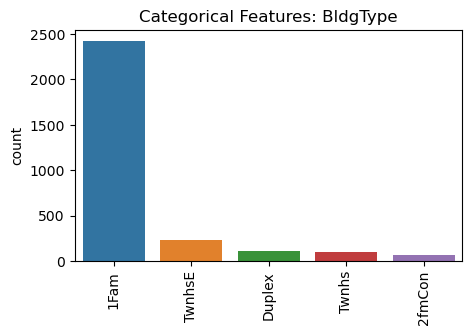

In [13]:
plt.figure(figsize=(5, 3))
plt.title('Categorical Features: BldgType')
plt.xticks(rotation=90)
y = df[object_cols[2]].value_counts()
plt.xticks(rotation=90)
sns.barplot(x=list(y.index), y=y)


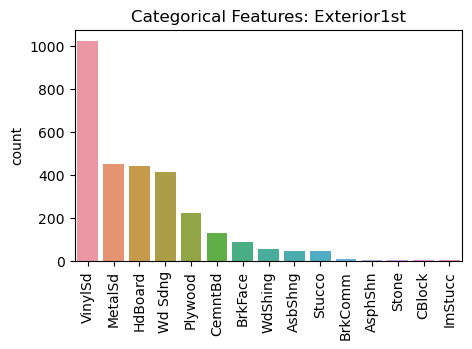

In [16]:
plt.figure(figsize=(5, 3))
plt.title('Categorical Features: Exterior1st')
plt.xticks(rotation=90)
y = df[object_cols[3]].value_counts()
plt.xticks(rotation=90)
sns.barplot(x=list(y.index), y=y)

new_dataset = df

### Let's understand what SalePrice for different Lot Areas

<Axes: xlabel='LotArea', ylabel='SalePrice'>

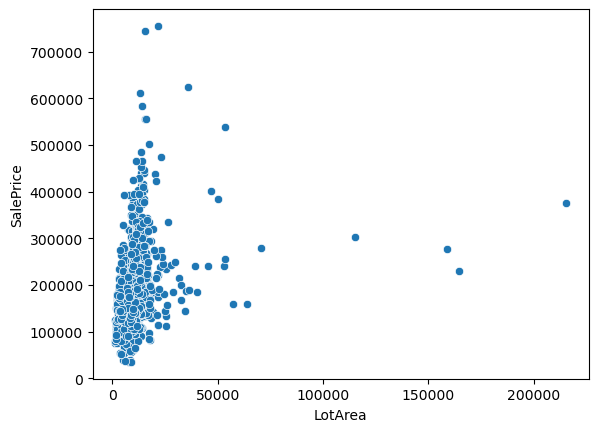

In [18]:
sns.scatterplot(x = "LotArea", y = "SalePrice", data = df)

# Data Cleaning

### Filling the null values with mode for categorical features and mean for numerical values for the better understanding and results instead of dropping

In [19]:
df["MSZoning"]    = df["MSZoning"].fillna(df["MSZoning"].mode()[0])
df["Exterior1st"] = df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["BsmtFinSF2"]  = df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].mean())
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean())

### importing LabelEncoder module from scikitlearn Library to convert categorical values in numerical values

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning'] = le.fit_transform(df['MSZoning'])
df['LotConfig'] = le.fit_transform(df['LotConfig'])
df['BldgType'] = le.fit_transform(df['BldgType'])
df['Exterior1st'] = le.fit_transform(df['Exterior1st'])

<Axes: >

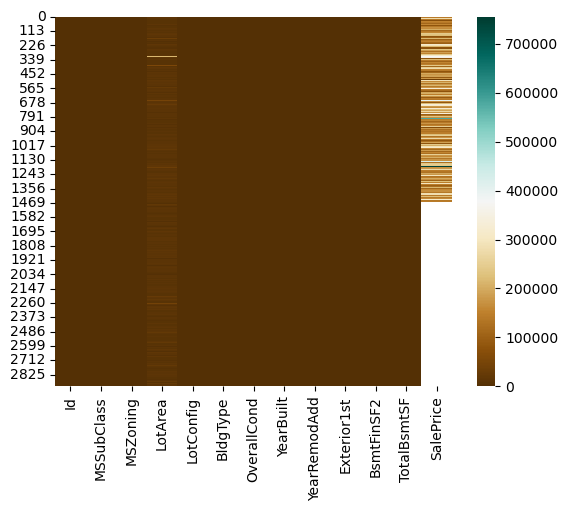

In [24]:
sns.heatmap(df, cmap = 'BrBG')

### Let's find which feature depends on which features with non graphical presentation

In [25]:
df.corr()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,0.012932,-0.040746,0.033606,0.006659,-0.002839,-0.016581,-0.050438,-0.019529,0.018249,-0.024922,-0.021917
MSSubClass,0.008931,1.000000,0.027386,-0.201730,0.073151,0.741508,-0.065625,0.034409,0.043315,-0.111893,-0.072520,-0.219936,-0.084284
MSZoning,0.012932,0.027386,1.000000,-0.034284,0.018972,-0.026731,0.182504,-0.311800,-0.191691,-0.052160,0.011103,-0.108340,-0.166872
LotArea,-0.040746,-0.201730,-0.034284,1.000000,-0.117687,-0.257673,-0.035617,0.024128,0.021612,0.013794,0.084055,0.254125,0.263843
LotConfig,0.033606,0.073151,0.018972,-0.117687,1.000000,0.106852,-0.020920,0.016909,0.004977,0.004691,-0.007980,-0.039147,-0.067396
BldgType,0.006659,0.741508,-0.026731,-0.257673,0.106852,1.000000,-0.148081,0.217971,0.110448,-0.128505,-0.026036,-0.017009,-0.085591
OverallCond,-0.002839,-0.065625,0.182504,-0.035617,-0.020920,-0.148081,1.000000,-0.368477,0.047654,-0.000160,0.041489,-0.173952,-0.077856
YearBuilt,-0.016581,0.034409,-0.311800,0.024128,0.016909,0.217971,-0.368477,1.000000,0.612235,0.103224,-0.027591,0.408466,0.522897
YearRemodAdd,-0.050438,0.043315,-0.191691,0.021612,0.004977,0.110448,0.047654,0.612235,1.000000,0.229767,-0.062125,0.297969,0.507101
Exterior1st,-0.019529,-0.111893,-0.052160,0.013794,0.004691,-0.128505,-0.000160,0.103224,0.229767,1.000000,-0.065413,0.032338,0.103551


### Let's find which feature depends on which features with graphical presentation

<Axes: >

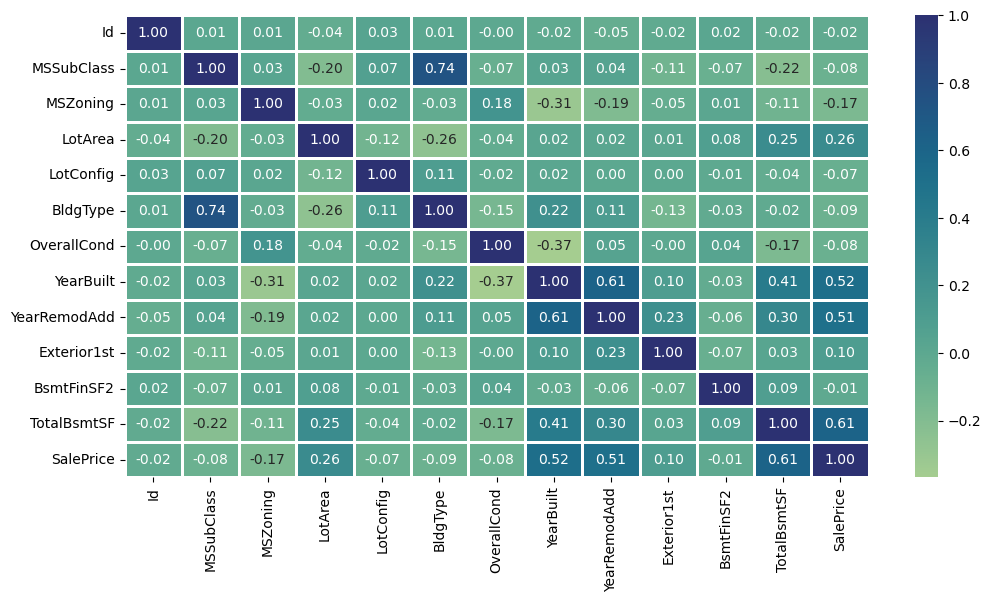

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap = "crest", fmt = '.2f', linewidths = 2, annot = True)

# Above heatmap shows that "SalePrice" of the house depends on "Total Basement Area" which has positive correlation and also with "House Built Year", "House Year of Remodification"

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


### Filling the null values with mean for SalePrice

In [35]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())
df.dropna(inplace=True)

One hot Encoding is the best way to convert categorical data into binary values which is numerical and let's apply wherver needed

In [37]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Machine Learning Modelling

### Splitting Dataset into Training and Testing for further testings with different models

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


### SVM – Support vector Machine

SVM is a Supervized Machine Learning type, can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane

In [42]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.17706502610023087


## Random Forest Regression

Random Forest is a Supervized Machine Learning Type, an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks

In [43]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.07861670452292874

## Linear Regression

Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [44]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18504163753190359


# Conclusion

Clearly, Random Forest Regression model is giving better accuracy as the mean absolute error is least among all the other regressor models i.e. 0.079 approximately.